In [ ]:
'''
【课程2.1】  缺失值处理

数据缺失主要包括记录缺失和字段信息缺失等情况，其对数据分析会有较大影响，导致结果不确定性更加显著

缺失值的处理：删除记录 / 数据插补 / 不处理

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [7]:
# 判断是否有缺失值数据 - isnull，notnull
# isnull：缺失值为True，非缺失值为False
# notnull：缺失值为False，非缺失值为True

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
print(s, '\n------')
print(df, '\n------')
# 创建数据

print(s.isnull())  # Series直接判断是否是缺失值，返回一个Series
print(df.notnull())  # Dataframe直接判断是否是缺失值，返回一个Series
print(df['value1'].notnull())  # 通过索引判断
print('------')

s2 = s[s.isnull() == False]  
df2 = df[df['value2'].notnull()]    # 注意和 df2 = df[df['value2'].notnull()] ['value1'] 的区别   见下一个cell
print(s2)
print(df2)
# 筛选非缺失值

0    12.0
1    33.0
2    45.0
3    23.0
4     NaN
5     NaN
6    66.0
7    54.0
8     NaN
9    99.0
dtype: float64 
------
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4      NaN      e
5      NaN    NaN
6     66.0    NaN
7     54.0      f
8      NaN      g
9     99.0    NaN
10   190.0      g 
------
0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool
    value1  value2
0     True    True
1     True    True
2     True    True
3     True    True
4    False    True
5    False   False
6     True   False
7     True    True
8    False    True
9     True   False
10    True    True
0      True
1      True
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9      True
10     True
Name: value1, dtype: bool
------
0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
    value1 value2
0     12.0      a
1     33.0      b

In [8]:
df2_1 = df[df['value2'].notnull()]    
df2_2 = df[df['value2'].notnull()] ['value1']
print(df2_1, '\n------')
print(df2_2, '\n------')

    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4      NaN      e
7     54.0      f
8      NaN      g
10   190.0      g 
------
0      12.0
1      33.0
2      45.0
3      23.0
4       NaN
7      54.0
8       NaN
10    190.0
Name: value1, dtype: float64 
------


In [9]:
# 删除缺失值 - dropna

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据

s.dropna(inplace = True)
df2 = df['value1'].dropna()
print(s)
print(df2)
# drop方法：可直接用于Series，Dataframe
# 注意inplace参数，默认False → 生成新的值

0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
0      12.0
1      33.0
2      45.0
3      23.0
6      66.0
7      54.0
9      99.0
10    190.0
Name: value1, dtype: float64


In [15]:
# 填充/替换缺失数据 - fillna、replace

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
# 创建数据

s.fillna(0,inplace = True)
print(s)
print('------')
# s.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
# value：填充值
# 注意inplace参数

df['value1'].fillna(method = 'pad',inplace = True)
print(df)
print('------')
# method参数：
# pad / ffill → 用之前的数据填充 
# backfill / bfill → 用之后的数据填充 

s = pd.Series([1,1,1,1,2,2,2,3,4,5,np.nan,np.nan,66,54,np.nan,99])
s.replace(np.nan,'缺失数据',inplace = True)
print(s)
print('------')
# df.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)
# to_replace → 被替换的值
# value → 替换值

s.replace([1,2,3],np.nan,inplace = True)
print(s)
# 多值用np.nan代替

0    12.0
1    33.0
2    45.0
3    23.0
4     0.0
5     0.0
6    66.0
7    54.0
8     0.0
9    99.0
dtype: float64
------
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4     23.0      e
5     23.0    NaN
6     66.0    NaN
7     54.0      f
8     54.0      g
9     99.0    NaN
10   190.0      g
------
0        1
1        1
2        1
3        1
4        2
5        2
6        2
7        3
8        4
9        5
10    缺失数据
11    缺失数据
12      66
13      54
14    缺失数据
15      99
dtype: object
------
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8        4
9        5
10    缺失数据
11    缺失数据
12      66
13      54
14    缺失数据
15      99
dtype: object


In [20]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （1）均值/中位数/众数插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])
print(s)
print('------')
# 创建数据

u = s.mean()     # 均值
me = s.median()  # 中位数
mod = s.mode()   # 众数
print('均值为：%.4f, 中位数为：%.2f' % (u,me))
print('众数为：', mod.tolist())
print('------')
# 分别求出均值/中位数/众数

s.fillna(u,inplace = True)
print(s)
# 用均值填补

0      1.0
1      2.0
2      3.0
3      NaN
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     NaN
11     NaN
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     NaN
18     3.0
19     4.0
dtype: float64
------
均值为：4.5625, 中位数为：4.50
众数为： [5.0]
------
0      1.0000
1      2.0000
2      3.0000
3      4.5625
4      3.0000
5      4.0000
6      5.0000
7      5.0000
8      5.0000
9      5.0000
10     4.5625
11     4.5625
12     6.0000
13     6.0000
14     7.0000
15    12.0000
16     2.0000
17     4.5625
18     3.0000
19     4.0000
dtype: float64


In [21]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （2）临近值插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])
#print(s)
print('------')
# 创建数据

s.fillna(method = 'ffill',inplace = True)
print(s)
# 用前值插补

------
0      1.0
1      2.0
2      3.0
3      3.0
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     5.0
11     5.0
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     2.0
18     3.0
19     4.0
dtype: float64


         2
-0.1111 x + 0.3333 x + 10
<class 'numpy.poly1d'>
插值10为：2.22
------


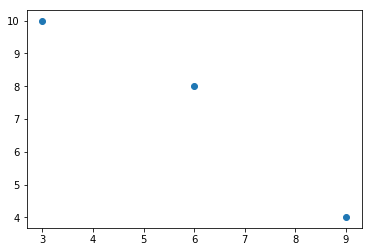

In [28]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法

from scipy.interpolate import lagrange
x = [3, 6, 9]
y = [10, 8, 4]
# plt.figure(figsize=(10,6))
plt.scatter(x, y)
print(lagrange(x,y))
print(type(lagrange(x,y)))
# 的输出值为的是多项式的n个系数
# 这里输出3个值，分别为a0,a1,a2
# y = a0 * x**2 + a1 * x + a2 → y = -0.11111111 * x**2 + 0.33333333 * x + 10

print('插值10为：%.2f' % lagrange(x,y)(10))
print('------')
# -0.11111111*100 + 0.33333333*10 + 10 = -11.11111111 + 3.33333333 +10 = 2.22222222